In [19]:
# Load the data, this takes a few seconds.
data98 <- read.csv("data/all1998.csv")
fields <- read.csv("data/fields.csv")
retro.ids <- read.csv("data/retrosheetIDs.csv")


# Install the Lahman package by un-commenting out the line below.
#install.packages('Lahman', repos='http://cran.us.r-project.org')
# library(Lahman)



In [25]:
# The all1998.csv file does NOT have headers in the file.
#  Add the Header values to data98 using the names() function
head(data98, n=1)  # Before adding the headers.
names(data98) <- fields[, "Header"]
head(data98, n=1)  # After adding the headers.


ANA199804010,NYA,X1,X0,X0.1,X0.2,X0.3,X,X0.4,X0.5,...,X0.16,X3,X0.17,X0.18,X4.2,X0.19,X0.20,X0.21,X0.22,X1.3
ANA199804010,NYA,1,0,1,0,0,,0,0,...,0,2,0,0,0,0,0,0,0,2


GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,...,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID
ANA199804010,NYA,1,0,1,0,0,,0,0,...,0,2,0,0,0,0,0,0,0,2


In [27]:
# Get the Player IDs from the Retrosheet data
sosa.id <- as.character(subset(retro.ids, FIRST=="Sammy" & LAST=="Sosa")$ID)
mac.id <- as.character(subset(retro.ids, FIRST=="Mark" & LAST=="McGwire")$ID)

# Get the Player Data now that we have the ID
sosa.data <- subset(data98, BAT_ID==sosa.id)
mac.data <- subset(data98, BAT_ID==mac.id)


In [33]:
# Create a function to summarize the HR data.

createData <- function(d){
    # Extract the date.
    d$Date <- as.Date(substr(d$GAME_ID, 4, 11), format="%Y%m%d")
    # Order by date.
    d <- d[order(d$Date),]
    # Track the home runs.
    d$HR <- ifelse(d$EVENT_CD == 23, 1, 0)
    # SUM the HR's so far
    d$cumHR <- cumsum(d$HR)
    # Return just the Date and Cumulative HR features.  
    d[, c("Date", "cumHR")]
}



In [44]:
# Call our CreateData function, passing in the raw data for the player.
mac.hr <- createData(mac.data)
sosa.hr <- createData(sosa.data)


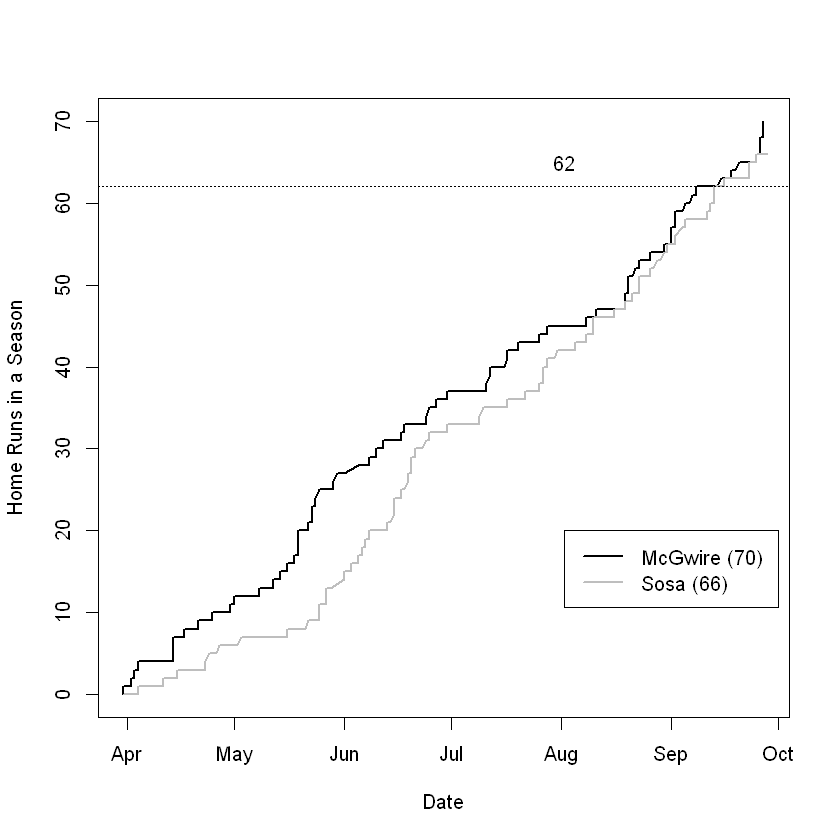

In [42]:
# Create the graph
plot(mac.hr, type="l", lwd=2, ylab="Home Runs in a Season")

# Add Sosa
lines(sosa.hr, lwd=2, col="grey")

# Add the HR record target
abline(h=62, lty=3)

# Add a label for the HR Record target.
text(10440, 65, "62")

# Add legends so we know which line is which
legend(10440, 20, legend=c("McGwire (70)", "Sosa (66)"), lwd=2, col=c("black", "grey"))


Challenge:  Re-Write this using a loop.